### WeatherPy

Data Viz Boot Camp | Python-API Homework

Due Tuesday, January 7, 2020


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lngs)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

290

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.


In [3]:
appid = api_key
base_url = "api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key
record = 1
set_num = 1
cityinfo = []
units = "Imperial"

print("Beginning Data Retrieval")
print("-----------------------------")

for cityname in cities:
    #print(cityname)
    base_url = "http://api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key+"&q="+cityname+"&units="+units
    #print(base_url)

    if record > 50:
        record = 1
        set_num = set_num+1
        
# Include a print log of each city as it'sbeing processed (with the city number and city name).
    base_url = "http://api.openweathermap.org/data/2.5/weather?"+"&appid="+api_key+"&q="+cityname  
    weather_response = requests.get(base_url)
    weather_json = weather_response.json()
    #print (weather_response)
    print("Processing Record "+str(record)+ " of Set " + str(set_num) + " | " +str(cityname))
    record = record+1
    #print(weather_json)
    if weather_json["cod"] == 200:
        cityinfo.append(weather_json)
   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | casino
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | nelson bay
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | illoqqortoormiut
Processing Record 6 of Set 1 | el nispero
Processing Record 7 of Set 1 | umzimvubu
Processing Record 8 of Set 1 | saleaula
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | tocopilla
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | ledyard
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | tazovskiy
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | pringsewu
Processing Record 19 of Set 1 | sahrak
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of Set 1 | ja

### Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [4]:
#print(cityinfo)
citytable = []

for citydata in cityinfo:
    citytable.append({"City": citydata["name"],"Cloudiness": citydata["clouds"]["all"],
                      "Country": citydata["sys"]["country"],"Date": citydata["dt"],
                      "Humidity": citydata["main"]["humidity"],"Lat": citydata["coord"]["lat"],
                      "Lng": citydata["coord"]["lon"],"Max Temp": citydata["main"]["temp_max"],
                      "Wind Speed": citydata["wind"]["speed"]})
city_df = pd.DataFrame(citytable)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Casino,0,AU,1578461102,36,-28.86,153.05,307.15,7.70
1,Carnarvon,58,ZA,1578461102,74,-30.97,22.13,293.24,7.19
2,Nelson Bay,90,AU,1578461102,73,-32.72,152.14,299.26,8.70
3,Karratha,100,AU,1578461102,76,-20.74,116.85,302.90,8.94
4,El Nispero,1,NI,1578461102,96,11.74,-84.55,294.07,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

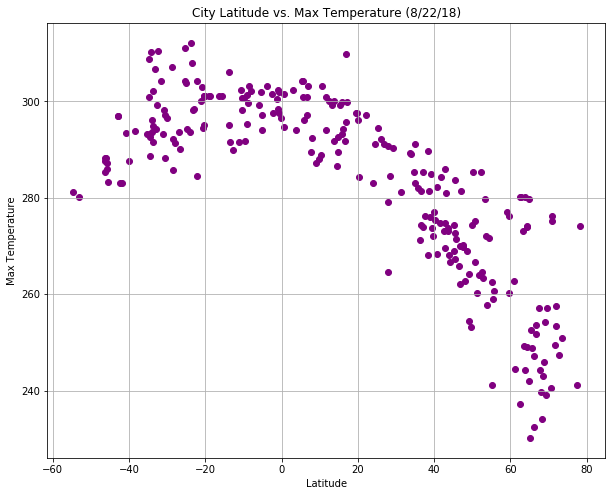

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"],city_df["Max Temp"],color="purple")

plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_temp.png")
# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

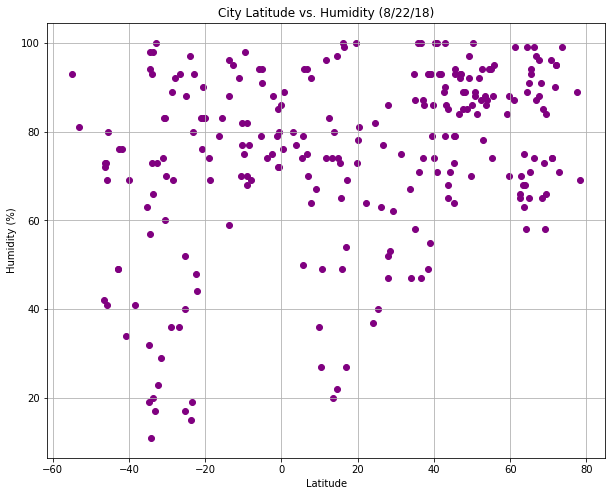

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Humidity"],color="purple")


plt.title("City Latitude vs. Humidity (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_humidity.png")
# Show the Figure
plt.show()



#### Latitude vs. Cloudiness Plot

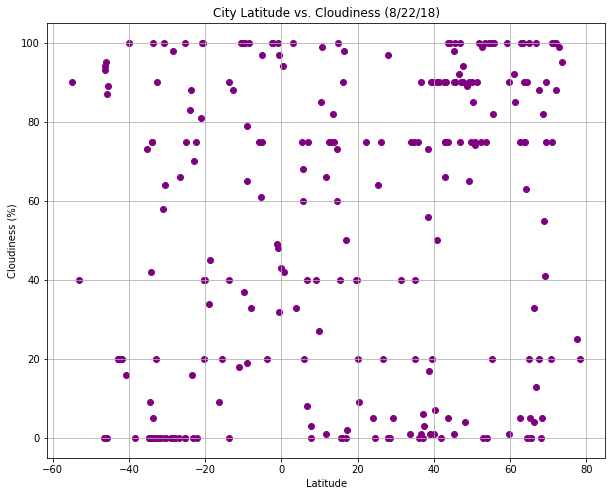

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Cloudiness"],color="purple")

plt.title("City Latitude vs. Cloudiness (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_clouds.png")
# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

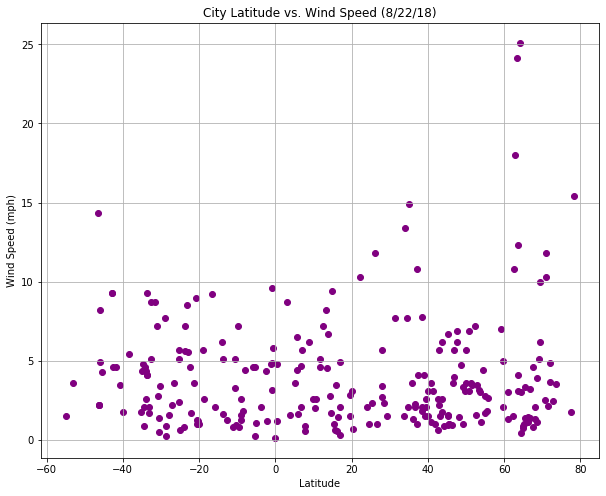

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(city_df["Lat"], city_df["Wind Speed"],color="purple")

plt.title("City Latitude vs. Wind Speed (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis = 'y')
plt.grid(axis = 'x')

# Save the Figure
plt.savefig("data/lat_vs_wind.png")
# Show the Figure
plt.show()